<a href="https://colab.research.google.com/github/AndreyDyachkov/python-dataviz-machine-learning/blob/main/nasa_api_plotly_express_and_go.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API and Plotly

# API

### Description of Meteorite landing data from NASA API

- NASA API portal: https://api.nasa.gov/
- Meteorite Landings API: https://data.nasa.gov/Earth-Science/Meteorite-Landings-API/c2vx-j9ed
- About the dataset: Meteorite Landings: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh
- Meteorite Landings JSON: https://data.nasa.gov/resource/gh4g-9sfh.json (2) https://data.nasa.gov/api/views/gh4g-9sfh/rows.json?accessType=DOWNLOAD

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import requests
import json

### Getting and preprocessing data

In [ ]:
base_url = 'https://data.nasa.gov/api/views/gh4g-9sfh/rows.json?accessType=DOWNLOAD'

In [ ]:
response = requests.get(base_url)

In [ ]:
#Checking if the request went through ok
response.ok

True

In [ ]:
#Checking the status code of the response: 200 is OK
response.status_code

200

In [ ]:
# Inspecting the content body of the response as text or string
#response.text

In [ ]:
# Inspecting the content of the response in bytes format it will send
#response.content

In [ ]:
info = response.json()

In [ ]:
# .loads(), which creates a Python dictionary from a JSON format string (just as response.json() does)
# .dumps(), which creates a JSON format string out of a Python
# https://www.w3schools.com/python/python_json.asp

In [ ]:
type(info)

dict

In [ ]:
info.keys()

dict_keys(['meta', 'data'])

#### Full title of the dataset

In [ ]:
title = info['meta']['view']['description']
title.split('.')[0]

'This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings'

#### List of columns

In [ ]:
column_list = []
for i in range(len(info['meta']['view']['columns'])):
  column_list.append(info['meta']['view']['columns'][i]['name'])

column_list

['sid',
 'id',
 'position',
 'created_at',
 'created_meta',
 'updated_at',
 'updated_meta',
 'meta',
 'name',
 'id',
 'nametype',
 'recclass',
 'mass (g)',
 'fall',
 'year',
 'reclat',
 'reclong',
 'GeoLocation',
 'States',
 'Counties']

Rename the "mass (g)" column to remove a space.

In [ ]:
column_list[12] = 'mass_g'

#### Dataset

In [ ]:
df0 = pd.DataFrame(info["data"])

In [ ]:
df = df0.copy()
df.head()

0                                     1   2           3   \
0  row-hzx5-myxf_ktcf  00000000-0000-0000-EB30-AA9E40EB9145   0  1446143734   
1  row-rcr3.5w34_59cn  00000000-0000-0000-FFB5-635F8479429F   0  1446143734   
2  row-gffa_citp-4gu8  00000000-0000-0000-30DC-F58CCDC03F20   0  1446143734   
3  row-tw78-y449.cqkk  00000000-0000-0000-B076-30BB78554996   0  1446143734   
4  row-adit.5t7p.agsg  00000000-0000-0000-6ED9-F23C5D364C3B   0  1446143734   

     4           5     6    7         8    9      10           11      12  \
0  None  1446143734  None  { }    Aachen    1  Valid           L5      21   
1  None  1446143734  None  { }    Aarhus    2  Valid           H6     720   
2  None  1446143734  None  { }      Abee    6  Valid          EH4  107000   
3  None  1446143734  None  { }  Acapulco   10  Valid  Acapulcoite    1914   
4  None  1446143734  None  { }   Achiras  370  Valid           L6     780   

     13                   14          15           16  \
0  Fell  1880-01-01T00:00:00   50.775000     6.083330   
1  Fell  1951-01-01T00:00:00   56.183330    10.233330   
2  Fell  1952-01-01T00:00:00   54.216670  -113.000000   
3  Fell  1976-01-01T00:00:00   16.883330   -99.900000   
4  Fell  1902-01-01T00:00:00  -33.166670   -64.950000   

                                        17    18    19  
0     [None, 50.775, 6.08333, None, False]  None  None  
1  [None, 56.18333, 10.23333, None, False]  None  None  
2    [None, 54.21667, -113.0, None, False]  None  None  
3     [None, 16.88333, -99.9, None, False]  None  None  
4   [None, -33.16667, -64.95, None, False]  None  None

In [ ]:
len(df.columns)

20

In [ ]:
df.columns = column_list
df.head()

sid                                    id  position  \
0  row-hzx5-myxf_ktcf  00000000-0000-0000-EB30-AA9E40EB9145         0   
1  row-rcr3.5w34_59cn  00000000-0000-0000-FFB5-635F8479429F         0   
2  row-gffa_citp-4gu8  00000000-0000-0000-30DC-F58CCDC03F20         0   
3  row-tw78-y449.cqkk  00000000-0000-0000-B076-30BB78554996         0   
4  row-adit.5t7p.agsg  00000000-0000-0000-6ED9-F23C5D364C3B         0   

   created_at created_meta  updated_at updated_meta meta      name   id  \
0  1446143734         None  1446143734         None  { }    Aachen    1   
1  1446143734         None  1446143734         None  { }    Aarhus    2   
2  1446143734         None  1446143734         None  { }      Abee    6   
3  1446143734         None  1446143734         None  { }  Acapulco   10   
4  1446143734         None  1446143734         None  { }   Achiras  370   

  nametype     recclass  mass_g  fall                 year      reclat  \
0    Valid           L5      21  Fell  1880-01-01T00:00:00   50.775000   
1    Valid           H6     720  Fell  1951-01-01T00:00:00   56.183330   
2    Valid          EH4  107000  Fell  1952-01-01T00:00:00   54.216670   
3    Valid  Acapulcoite    1914  Fell  1976-01-01T00:00:00   16.883330   
4    Valid           L6     780  Fell  1902-01-01T00:00:00  -33.166670   

       reclong                              GeoLocation States Counties  
0     6.083330     [None, 50.775, 6.08333, None, False]   None     None  
1    10.233330  [None, 56.18333, 10.23333, None, False]   None     None  
2  -113.000000    [None, 54.21667, -113.0, None, False]   None     None  
3   -99.900000     [None, 16.88333, -99.9, None, False]   None     None  
4   -64.950000   [None, -33.16667, -64.95, None, False]   None     None

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sid           45716 non-null  object
 1   id            45716 non-null  object
 2   position      45716 non-null  int64 
 3   created_at    45716 non-null  int64 
 4   created_meta  0 non-null      object
 5   updated_at    45716 non-null  int64 
 6   updated_meta  0 non-null      object
 7   meta          45716 non-null  object
 8   name          45716 non-null  object
 9   id            45716 non-null  object
 10  nametype      45716 non-null  object
 11  recclass      45716 non-null  object
 12  mass_g        45585 non-null  object
 13  fall          45716 non-null  object
 14  year          45425 non-null  object
 15  reclat        38401 non-null  object
 16  reclong       38401 non-null  object
 17  GeoLocation   38401 non-null  object
 18  States        1659 non-null   object
 19  Coun

Drop unnecessary columns

In [ ]:
df.drop(['sid',
 'id',
 'position',
 'created_at',
 'created_meta',
 'updated_at',
 'updated_meta',
 'meta',
 'reclat',
 'reclong',
 'States',
 'Counties'], axis=1, inplace=True)

In [ ]:
df.head()

name nametype     recclass  mass_g  fall                 year  \
0    Aachen    Valid           L5      21  Fell  1880-01-01T00:00:00   
1    Aarhus    Valid           H6     720  Fell  1951-01-01T00:00:00   
2      Abee    Valid          EH4  107000  Fell  1952-01-01T00:00:00   
3  Acapulco    Valid  Acapulcoite    1914  Fell  1976-01-01T00:00:00   
4   Achiras    Valid           L6     780  Fell  1902-01-01T00:00:00   

                               GeoLocation  
0     [None, 50.775, 6.08333, None, False]  
1  [None, 56.18333, 10.23333, None, False]  
2    [None, 54.21667, -113.0, None, False]  
3     [None, 16.88333, -99.9, None, False]  
4   [None, -33.16667, -64.95, None, False]

Check and remove missing values

In [ ]:
df.isnull().sum()

name              0
nametype          0
recclass          0
mass_g          131
fall              0
year            291
GeoLocation    7315
dtype: int64

In [ ]:
df.dropna(subset=['mass_g', 'year'], inplace=True)

Fix the data types

In [ ]:
df['mass_g'] = df['mass_g'].astype(float)

In [ ]:
df['datetime'] = pd.to_datetime(df['year'], errors = 'coerce')

Added errors='coerce' parameter, as there are too old dates for this pandas format which return an error: Out of bounds nanosecond timestamp: 1583-01-01 00:00:00 (see: https://stackoverflow.com/questions/32888124/pandas-out-of-bounds-nanosecond-timestamp-after-offset-rollforward-plus-adding-a ).

In [ ]:
df = df[~df['datetime'].isna()]

In [ ]:
df['year'] = df['datetime'].dt.year

<ipython-input-98-078d9ff31b5a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.drop(['datetime'], axis=1, inplace=True)

<ipython-input-99-370bae561689>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

name nametype     recclass    mass_g  fall  year  \
0    Aachen    Valid           L5      21.0  Fell  1880   
1    Aarhus    Valid           H6     720.0  Fell  1951   
2      Abee    Valid          EH4  107000.0  Fell  1952   
3  Acapulco    Valid  Acapulcoite    1914.0  Fell  1976   
4   Achiras    Valid           L6     780.0  Fell  1902   

                               GeoLocation  
0     [None, 50.775, 6.08333, None, False]  
1  [None, 56.18333, 10.23333, None, False]  
2    [None, 54.21667, -113.0, None, False]  
3     [None, 16.88333, -99.9, None, False]  
4   [None, -33.16667, -64.95, None, False]

### EDA

#### Nametype column

Description: 'valid' is for most meteorites and 'relict' are for objects that were once meteorites but are now highly altered by weathering on Earth.

In [ ]:
df['nametype'].value_counts()

Valid     45270
Relict       26
Name: nametype, dtype: int64

#### Reclass column

In [ ]:
df['recclass'].value_counts()

L6         8233
H5         7102
L5         4755
H6         4515
H4         4185
           ... 
L3.8-an       1
L/LL4/5       1
L/LL3-6       1
H/L3.5        1
L/LL          1
Name: recclass, Length: 459, dtype: int64

Let's decrease the number of classes by removing special characters (such as number, /, . etc.)

In [ ]:
df['recclass'] = df['recclass'].str.split(',').str[0]
df['recclass'] = df['recclass'].str.split('/').str[0]
df['recclass'] = df['recclass'].str.split('-').str[0]
df['recclass'] = df['recclass'].str.split('.').str[0]
df['recclass'] = df['recclass'].str.replace('\d+', '', regex=True)
df['recclass'] = df['recclass'].str.replace('~', '', regex=True)

In [ ]:
df['recclass'].value_counts()

H                 17772
L                 15718
LL                 5857
Iron               1022
Eucrite             678
                  ...  
LL<                   1
EL                    1
Lunar (norite)        1
Iron?                 1
Pallasite?            1
Name: recclass, Length: 72, dtype: int64

#### Fall column

In [ ]:
df['fall'].value_counts()

Found    44233
Fell      1063
Name: fall, dtype: int64

#### Mass column

In [ ]:
df['mass_g'].describe().round(1)

count       45296.0
mean        11985.3
std        524687.0
min             0.0
25%             7.1
50%            32.1
75%           200.0
max      60000000.0
Name: mass_g, dtype: float64

#### Year column

In [ ]:
df['year'].describe().round(0)

count    45296.0
mean      1992.0
std         22.0
min       1688.0
25%       1987.0
50%       1998.0
75%       2003.0
max       2101.0
Name: year, dtype: float64

Fix an error in data (checked on NASA site)

In [ ]:
df.loc[df['year']==2101,'year'] = 2010

Add the decade column to group by it

In [ ]:
df['decade'] = (df['year']//10)*10
df.head()

name nametype     recclass    mass_g  fall  year  \
0    Aachen    Valid            L      21.0  Fell  1880   
1    Aarhus    Valid            H     720.0  Fell  1951   
2      Abee    Valid           EH  107000.0  Fell  1952   
3  Acapulco    Valid  Acapulcoite    1914.0  Fell  1976   
4   Achiras    Valid            L     780.0  Fell  1902   

                               GeoLocation  decade  
0     [None, 50.775, 6.08333, None, False]    1880  
1  [None, 56.18333, 10.23333, None, False]    1950  
2    [None, 54.21667, -113.0, None, False]    1950  
3     [None, 16.88333, -99.9, None, False]    1970  
4   [None, -33.16667, -64.95, None, False]    1900

In [ ]:
df['decade'].value_counts()

2000    17739
1990    11586
1980     6816
1970     4962
2010     1964
1960      386
1930      300
1950      205
1940      192
1920      158
1910      152
1900      139
1890      126
1880      122
1860       95
1870       89
1850       71
1840       47
1830       33
1810       30
1820       29
1800       22
1790       11
1780        5
1760        3
1750        3
1740        3
1770        3
1720        2
1710        2
1680        1
Name: decade, dtype: int64

### Preparing the dataset for visualization

Let's remove rows with outliers in the mass column (use IQR) and years before year 1800, when there is a small amount of data. All for better vizualisation.

In [ ]:
Q1 = df['mass_g'].quantile(0.25)
Q3 = df['mass_g'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = df['mass_g'].quantile(0.75) + 10*1.5*IQR
lower_limit = df['mass_g'].quantile(0.25) - 1.5*IQR

In [ ]:
df1 = df[(df['mass_g']<upper_limit)&(df['mass_g']>lower_limit)&(df['decade']>=1800)]
df1

name nametype     recclass  mass_g   fall  year  \
0                   Aachen    Valid            L    21.0   Fell  1880   
1                   Aarhus    Valid            H   720.0   Fell  1951   
3                 Acapulco    Valid  Acapulcoite  1914.0   Fell  1976   
4                  Achiras    Valid            L   780.0   Fell  1902   
6      Adzhi-Bogdo (stone)    Valid           LL   910.0   Fell  1949   
...                    ...      ...          ...     ...    ...   ...   
45711           Zillah 002    Valid      Eucrite   172.0  Found  1990   
45712               Zinder    Valid    Pallasite    46.0  Found  1999   
45713                 Zlin    Valid            H     3.3  Found  1939   
45714            Zubkovsky    Valid            L  2167.0  Found  2003   
45715           Zulu Queen    Valid            L   200.0  Found  1976   

                                     GeoLocation  decade  
0           [None, 50.775, 6.08333, None, False]    1880  
1        [None, 56.18333, 10.23333, None, False]    1950  
3           [None, 16.88333, -99.9, None, False]    1970  
4         [None, -33.16667, -64.95, None, False]    1900  
6        [None, 44.83333, 95.16667, None, False]    1940  
...                                          ...     ...  
45711       [None, 29.037, 17.0185, None, False]    1990  
45712     [None, 13.78333, 8.96667, None, False]    1990  
45713       [None, 49.25, 17.66667, None, False]    1930  
45714     [None, 49.78917, 41.5046, None, False]    2000  
45715  [None, 33.98333, -115.68333, None, False]    1970  

[42679 rows x 8 columns]

In [ ]:
df1.describe()

mass_g          year        decade
count  42679.000000  42679.000000  42679.000000
mean     185.751045   1994.380210   1989.420324
std      419.676946     16.106662     16.722708
min        0.000000   1801.000000   1800.000000
25%        6.500000   1988.000000   1980.000000
50%       26.800000   1998.000000   1990.000000
75%      138.450000   2003.000000   2000.000000
max     3092.140000   2013.000000   2010.000000

In [ ]:
df1_decades = df1.groupby(['decade','fall'])['mass_g'].agg(['mean', 'count']).reset_index()
df1_decades.head()

decade   fall        mean  count
0    1800   Fell   494.75000      8
1    1810   Fell  1111.97500     12
2    1820   Fell   977.58125     16
3    1820  Found  1100.00000      1
4    1830   Fell   837.75000     12

In [ ]:
df1_classes = df1.groupby(['recclass','fall'])['mass_g'].agg(['mean', 'count']).reset_index()
df1_classes.head()

recclass   fall         mean  count
0  Acapulcoite   Fell  1914.000000      1
1  Acapulcoite  Found   171.956517     58
2   Achondrite   Fell     0.150000      1
3   Achondrite  Found   311.500862     58
4      Angrite   Fell  1500.000000      1

Let's take top15 classes

In [ ]:
top_names = df1_classes.groupby(['recclass'])['recclass'].count().sort_values(ascending=False).head(15).index.tolist()
top_names

['Acapulcoite',
 'L',
 'Eucrite',
 'H',
 'H?',
 'Howardite',
 'Iron',
 'Achondrite',
 'K',
 'LL',
 'EH',
 'Lodranite',
 'Mesosiderite',
 'OC',
 'Pallasite']

In [ ]:
df1_top_classes = df1_classes[df1_classes['recclass'].isin(top_names)].sort_values(by='count', ascending=False)
df1_top_classes

recclass   fall         mean  count
43             H  Found   156.921673  16843
58             L  Found   191.610877  14749
64            LL  Found   135.192494   5685
40       Eucrite  Found   239.406474    622
53          Iron  Found   730.522795    347
50     Howardite  Found   256.380864    220
57             L   Fell   966.096842    190
42             H   Fell   973.912882    170
34            EH  Found   189.179830    159
85  Mesosiderite  Found   326.839147    143
1    Acapulcoite  Found   171.956517     58
3     Achondrite  Found   311.500862     58
88            OC  Found   693.281786     56
63            LL   Fell   894.889796     49
70     Lodranite  Found   244.278500     40
90     Pallasite  Found   654.192895     38
39       Eucrite   Fell   931.041667     24
87            OC   Fell   836.505882     17
49     Howardite   Fell   996.228571     14
52          Iron   Fell   978.716667     12
33            EH   Fell  1142.666667      3
56             K  Found    17.050000      2
89     Pallasite   Fell   186.000000      2
55             K   Fell   350.000000      1
48            H?  Found   860.000000      1
47            H?   Fell     0.200000      1
69     Lodranite   Fell  1000.000000      1
84  Mesosiderite   Fell   188.000000      1
2     Achondrite   Fell     0.150000      1
0    Acapulcoite   Fell  1914.000000      1

# Visualization (Plotly)

https://plotly.com/python/

#### Palette

Source: https://coolors.co/

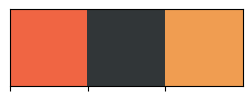

In [ ]:
import seaborn as sns
palette = ['#F06543','#313638','#F09D51']
sns.palplot(palette)

### Import libraries

In [ ]:
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
#import plotly.tools as tls
#from plotly.offline import iplot  #iplot only works with this code (use offline)

## Scatter plot

### Plotly Express

In [ ]:

fig = px.scatter(df1,
                 x="year",
                 y="mass_g",
                 color="mass_g",
                 title='Distribution by mass over years',
                 hover_data=['name',	'nametype',	'recclass'])
fig.show()

Marginal Distribution Plots

In [ ]:
fig = px.scatter(df1,
                 x="year",
                 y="mass_g",
                 title='Distribution of mass over years',
                 color_discrete_sequence= [palette[0]],
                 marginal_x="histogram",
                 marginal_y="box")
fig.show()

Facetting

In [ ]:
fig = px.scatter(df1,
                 x="year",
                 y="mass_g",
                 color="nametype",
                 color_discrete_sequence= [palette[2],palette[1]],
                 facet_col="fall",
                 title='Distribution of mass over years in two groups: fallen and found')
fig.show()

### Go

In [ ]:
fig = go.Figure(data=go.Scatter(x=df1['year'],
                                y=df1['mass_g'],
                                marker_color=palette[0],
                                mode='markers'))

fig.update_layout(title='Distribution of mass over years',
                  xaxis_title="Years",
                  yaxis_title="Mass (g)")
fig.show()

In [ ]:
fell = df1[df1['fall']=='Fell']
found = df1[df1['fall']=='Found']

fig = go.Figure()

fig.add_trace(go.Scatter(x=found['year'],
                         y=found['mass_g'],
                         name='Found',
                         marker_color=palette[1],
                         text=found['name'])) # hover text goes here
fig.add_trace(go.Scatter(x=fell['year'],
                         y=fell['mass_g'],
                         name='Fell',
                         #mode='markers',
                         marker_color=palette[2],
                         text=fell['name']))

# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers',
                  marker_line_width=1,
                  marker_size=10)
fig.update_layout(title='Distribution of mass over years in two groups: fallen and found',
                  xaxis_title="Years",
                  yaxis_title="Mass (g)",
                  legend_title="Fall",
                  yaxis_zeroline=False,
                  xaxis_zeroline=False)
fig.show()

## Line chart

### Plotly Express

In [ ]:
fig = px.line(df1_decades,
              x='decade',
              y='mean',
              color='fall',
              markers=True,
              color_discrete_sequence= [palette[2],palette[1]],
              title='Average mass per decade in two groups: fallen and found')
fig.show()

### Go

In [ ]:
fell = df1_decades[df1_decades['fall']=='Fell']
found = df1_decades[df1_decades['fall']=='Found']

fig = go.Figure()

fig.add_trace(go.Scatter(x=found['decade'],
                         y=found['mean'],
                         name='Found',
                         marker_color=palette[1],
                         text=found['mean'])) # hover text goes here
fig.add_trace(go.Scatter(x=fell['decade'],
                         y=fell['mean'],
                         name='Fell',
                         #mode='markers',
                         marker_color=palette[2],
                         text=fell['mean']))

fig.update_layout(title="Average mass per decade in two groups: fallen and found",
                  xaxis_title="Years",
                  yaxis_title="Mean mass (g)",
                  legend_title="Fall")

fig.show()

## Bar Chart

### Plotly Express

In [ ]:
fig = px.bar(df1_top_classes,
             x='recclass',
             y='count',
             color='fall',
             barmode = 'group',
             color_discrete_sequence= [palette[2],palette[1]],
             title='Count Fallen and Found Meteorites by Class')
fig.show()

### Go

In [ ]:
fig = go.Figure(data=go.Bar(x=df1_top_classes[df1_top_classes['fall']=='Found']['recclass'],
                            y=df1_top_classes[df1_top_classes['fall']=='Found']['count'],
                            marker_color=palette[0]))

fig.update_layout(title='Count Found Meteorites by Class',
                  xaxis_title="Class",
                  yaxis_title="Count")
fig.show()

In [ ]:
fell = df1_top_classes[df1_top_classes['fall']=='Fell']
found = df1_top_classes[df1_top_classes['fall']=='Found']

fig = go.Figure(data=[go.Bar(name = 'Found',
                             x=found['recclass'],
                             y=found['count'],
                             marker_color=palette[2]),
                      go.Bar(name = 'Fell',
                             x=fell['recclass'],
                             y=fell['count'],
                             marker_color=palette[1])])

fig.update_layout(title='Count Fallen and Found Meteorites by Class',
                  xaxis_title="Class",
                  yaxis_title="Count",
                  barmode='group',
                  legend_title="Fall")
fig.show()

In [ ]:
fell = df1_top_classes[df1_top_classes['fall']=='Fell']
found = df1_top_classes[df1_top_classes['fall']=='Found']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=found['recclass'], y=found['count'],
    name='Found',
    marker_color=palette[2],
))

fig.add_trace(go.Bar(
    x=fell['recclass'], y=fell['count'],
    name='Fell',
    marker_color=palette[1],
))

fig.update_layout(
    title="Count Fallen and Found Meteorites by Class",
    xaxis_title="Class",
    yaxis_title="Count",
    legend_title="Fall",
)
fig.show()

## Histogram

### Plotly Express

In [ ]:
fig = px.histogram(df1,
                   x='mass_g',
                   nbins = 30,
                   color = "fall",
                   color_discrete_sequence= [palette[1],palette[2]],
                   marginal = 'box',
                   title = 'Distribution of mass in two groups: fallen and found')
fig.show()

### Go

In [ ]:
fig = go.Figure(data=[go.Histogram(x=df1['mass_g'],
                                   marker_color=palette[0],
                                   nbinsx = 30)])

fig.update_layout(title='Distribution of mass',
                  xaxis_title="Mass (g)",
                  yaxis_title="Count")
fig.show()

In [ ]:
fell = df1[df1['fall']=='Fell']
found = df1[df1['fall']=='Found']

fig = go.Figure(data=[go.Histogram(name = 'Fell',
                                   x=fell['mass_g'],
                                   marker_color=palette[1],
                                   nbinsx = 30),
                      go.Histogram(name = 'Found',
                                   x=found['mass_g'],
                                   marker_color=palette[2],
                                   nbinsx = 30)])

fig.update_layout(title='Distribution of mass in two groups: fallen and found',
                  xaxis_title="Mass (g)",
                  yaxis_title="Count",
                  legend_title="Fall",
                  barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
fell = df1[df1['fall']=='Fell']
found = df1[df1['fall']=='Found']

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=fell['mass_g'],
    name='Fell',
    marker_color=palette[1],
    nbinsx = 30
))

fig.add_trace(go.Histogram(
    x=found['mass_g'],
    name='Found',
    marker_color=palette[2],
    nbinsx = 30
))

fig.update_layout(
    title='Distribution of mass in two groups: fallen and found',
    xaxis_title="Mass (g)",
    yaxis_title="Count",
    legend_title="Fall",
    barmode='overlay'
)

fig.update_traces(opacity=0.75)
fig.show()

## Box plot

### Plotly Express

In [ ]:
fig = px.box(df1,
             x="fall",
             y="mass_g",
             points="all",
             title="Distribution of mass in two groups: fallen and found",
             hover_data=["fall"],
             color_discrete_sequence= [palette[2]])
fig.show()

### Go

In [ ]:
fell = df1[df1['fall']=='Fell']
found = df1[df1['fall']=='Found']

fig = go.Figure()

fig.add_trace(go.Box(
    y=fell['mass_g'],
    name='Fell',
    marker_color=palette[1],
))

fig.add_trace(go.Box(
    y=found['mass_g'],
    name='Found',
    marker_color=palette[2],
))

fig.update_layout(
    title='Distribution of mass in two groups: fallen and found',
    xaxis_title="Mass (g)",
    yaxis_title="Count",
    legend_title="Fall",
)

fig.update_traces(opacity=0.75)
fig.show()

## Multiple subplots

In [ ]:
fell = df1_top_classes[df1_top_classes['fall']=='Fell']
found = df1_top_classes[df1_top_classes['fall']=='Found']

fig = make_subplots(rows=2, cols=2)

fig.append_trace(go.Scatter(
   x=fell['recclass'],
   y=fell['mean'],
   name = "Average mass of fallen meteorites",
   marker_color=palette[2]
), row=1, col=1)

fig.append_trace(go.Bar(
   x=fell['recclass'],
   y=fell['count'],
   name = "Count fallen meteorites",
   marker_color=palette[2]
), row=2, col=1)

fig.append_trace(go.Scatter(
   x=found['recclass'],
   y=found['mean'],
   name = "Average mass of found meteorites",
   marker_color=palette[1]
), row=1, col=2)

fig.append_trace(go.Bar(
   x=found['recclass'],
   y=found['count'],
   name = "Count of fallen meteorites",
   marker_color=palette[1]
), row=2, col=2)


fig.update_layout(title_text="Fallen and found meteorites: average mass and count")
fig.show()

## Map

Process the dataset to get latitude and longitude

In [ ]:
df1_map = df1[~df1['GeoLocation'].isna()]

In [ ]:
df1_map[['1','latitude','longitude','4','5']] = pd.DataFrame(df1_map['GeoLocation'].tolist(), index= df1_map.index)
df1_map.drop(['1','4','5'], axis=1, inplace=True)
df1_map

<ipython-input-139-6c93020edd53>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-6c93020edd53>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-6c93020edd53>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-6c9

name nametype     recclass  mass_g   fall  year  \
0                   Aachen    Valid            L    21.0   Fell  1880   
1                   Aarhus    Valid            H   720.0   Fell  1951   
3                 Acapulco    Valid  Acapulcoite  1914.0   Fell  1976   
4                  Achiras    Valid            L   780.0   Fell  1902   
6      Adzhi-Bogdo (stone)    Valid           LL   910.0   Fell  1949   
...                    ...      ...          ...     ...    ...   ...   
45711           Zillah 002    Valid      Eucrite   172.0  Found  1990   
45712               Zinder    Valid    Pallasite    46.0  Found  1999   
45713                 Zlin    Valid            H     3.3  Found  1939   
45714            Zubkovsky    Valid            L  2167.0  Found  2003   
45715           Zulu Queen    Valid            L   200.0  Found  1976   

                                     GeoLocation  decade   latitude  \
0           [None, 50.775, 6.08333, None, False]    1880     50.775   
1        [None, 56.18333, 10.23333, None, False]    1950   56.18333   
3           [None, 16.88333, -99.9, None, False]    1970   16.88333   
4         [None, -33.16667, -64.95, None, False]    1900  -33.16667   
6        [None, 44.83333, 95.16667, None, False]    1940   44.83333   
...                                          ...     ...        ...   
45711       [None, 29.037, 17.0185, None, False]    1990     29.037   
45712     [None, 13.78333, 8.96667, None, False]    1990   13.78333   
45713       [None, 49.25, 17.66667, None, False]    1930      49.25   
45714     [None, 49.78917, 41.5046, None, False]    2000   49.78917   
45715  [None, 33.98333, -115.68333, None, False]    1970   33.98333   

        longitude  
0         6.08333  
1        10.23333  
3           -99.9  
4          -64.95  
6        95.16667  
...           ...  
45711     17.0185  
45712     8.96667  
45713    17.66667  
45714     41.5046  
45715  -115.68333  

[35750 rows x 10 columns]

In [ ]:
df1_map[['latitude','longitude']] = df1_map[['latitude','longitude']].astype(float)

<ipython-input-140-c6e1ce7606da>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter_geo(df1_map,
                     lat ='latitude',
                     lon='longitude',
                     size="mass_g",
                     hover_name="name",
                     color_discrete_sequence=[palette[0]],
                     title = 'Meteorite landing map',
                     projection="natural earth")
fig.show()